# Resource Quantification Estimation
Here is a simple method for resource quantification using numerical simulation. It leverages the fact that the only way for mRNA or protein to "disappear" from a system is via degradation/dilution.

## Energetic Costs of Individual mRNAs and Proteins
The cost of transcription and translation can be estimated by the amount of phosphate bonds involved in the biosynthesis of each nucleotide or amino acid used as well as for the elongation process. These were determined in experiments by Lynch and Marinov in their paper, [Bioenergetic Costs of a Gene](https://doi.org/10.1073/pnas.1514974112).

### Transcription
An approximate average for the synthesis of nucleoside triphosphates (NTPs) is 46 phosphate bonds, with an additional 2 for polymersiation for a total of 48 phosphate bonds. This is summarised in the following equation, with $\epsilon$ representing the length of the gene sequence in nucleotides.

\begin{align*}
    \text{cost}_{m_i} = \epsilon \cdot 48
\end{align*}

### Translation
The costs for translation are more complicated with each amino acid having varying biosynthesis costs. The approach is to multiply the number of each amino acid in a protein sequence by its associated cost and sum over all amino acids. 

\begin{align*}
    \text{cost}_{x_i} = \sum_{AA} \text{number of AA} \cdot \text{cost of AA}
\end{align*}

The phosphate costs of each amino acid in the table below:

| **Amino Acid** | **One-letter symbol** | **~P Cost** |
|----------------|-----------------------|-------------|
| Ala            | A                     | 11.7        |
| Cys            | C                     | 24.7        |
| Asp            | D                     | 12.7        |
| Glu            | E                     | 15.3        |
| Phe            | F                     | 52.0        |
| Gly            | G                     | 11.7        |
| His            | H                     | 38.3        |
| Ile            | I                     | 32.3        |
| Lys            | K                     | 30.3        |
| Leu            | L                     | 27.3        |
| Met            | M                     | 34.3        |
| Asn            | N                     | 14.7        |
| Pro            | P                     | 20.3        |
| Gln            | Q                     | 16.3        |
| Arg            | R                     | 27.3        |
| Ser            | S                     | 11.7        |
| Thr            | T                     | 18.7        |
| Val            | V                     | 23.3        |
| Trp            | W                     | 74.3        |
| Tyr            | Y                     | 50.0        |

- The total cost of expressing a gene over the life of an organism can be estimated as the individual cost multiplied by the concentration determined from a numerical simulation. 
- We discretise the ODEs and change the differential of a species into difference equations. 
- To calculate the total amount of a species synthesis, we utilise the fact that degradation/dilution terms are linear and that the concentration of a species is calculated at every time point. 
- In this manner, we can simply calculate the amount of a species that has been degraded/diluted (in terms of concentration) to the concentration of the species at steady-state added to the initial concentration to obtain the total amount synthesised (in terms of concentration). 
- Finally, we can multiply the concentration by the volume to obtain the amount. In the case of \emph{E. coli}, the volume can be regarded at $1 \mu M$. 

After numerical simulation, we can extract the time-series data of a species, $A_i$, from the solution vector. This is a sequence of numbers, \{$\mathbf{A}_i$\}. 
\begin{align*}
    \mathbf{A}_i &= \begin{bmatrix}
        A_i [0] \\
        A_i [1] \\
        \vdots \\
        A_i [N] \\
      \end{bmatrix}
\end{align*}

Where $N$ is the number of time points simulated.

The calculation the total number of an mRNA ($m_i$) or protein ($x^\omega$) species simulated up to time, $t$, is as follows:
\begin{align*}
    \dot{m}_i [t] &= m_i [t] - m_i [t-1] = k_{\text{eff}, 1; i} \cdot g^T_i - \delta_i \cdot m_i [t] \\
    m_i [t] &= \sum_1^{\tau = t} (k_{\text{eff}, 1; i} \cdot g^T_i - \delta_i \cdot m_i [\tau]) + m_i[0]\\
    m_{i,\text{ synthesised}} [t] &=  k_{\text{eff}, 1; i} \cdot g^T_i \cdot t + m_i[0] \\
    &= \sum_1^{\tau = t} ( k_{\text{eff}, 1; i} \cdot g^T_i - \delta_i \cdot m_i [\tau] ) + \sum_1^{\tau = t} \delta_i \cdot m_i [\tau] + m_i[0] \\
    &= m_i [t] + m_i[0] + \delta_i \cdot \sum_1^{\tau = t} m_i [\tau]\\
    x^{\omega}_{i,\text{ synthesised}} [t] &= x^{\omega}_i [t] + x^{\omega}_i [0] + \lambda \cdot \sum_1^{\tau = t} x^{\omega}_i [\tau]
\end{align*}

Species are denoted as discrete functions of time to reflect the numerical simulation. This is signified by the square brackets around the variable, $t$. 

The amount synthesised over the number of time points simulated, $N$, would be $m_{i, \text{ synthesised}} [N]$ and $x^{\omega}_{i,\text{ synthesised}} [N]$. When additional reactions that involve a species are present, we can simply perform a linear addition of the synthesis terms of the additional related species.

## Example using Activation Cascade
As a reminder, the reaction equations are:

#### Node 1

\begin{align*}
    \varnothing &\xrightarrow{k_{eff,1;1} \cdot g^T_1} m_1 \\
    m_1 &\xrightarrow{k_{eff,2;1}} x^0_1 \\
    m_1 &\xrightarrow{\delta_1} \varnothing \\
    x^0_1 &\xrightarrow{\lambda} \varnothing
\end{align*}

#### Edge 1

\begin{align*}
    x^0_1 + n'_1 \cdot I_1 &\xleftrightharpoons[\kappa_1^-]{\kappa_1^+} x^+_1 \\
    x^+_1 &\xrightarrow{\lambda} \varnothing
\end{align*}

#### Node 2

\begin{align*}
    \varnothing &\xrightarrow{k_{eff,1;2} \cdot g^T_2 \cdot \alpha(x_1, n_1)} m_2 \\
    m_2 &\xrightarrow{k_{eff,2;2}} x^0_2 \\
    m_2 &\xrightarrow{\delta_2} \varnothing \\
    x^0_2 &\xrightarrow{\lambda} \varnothing
\end{align*}

#### Edge 2

\begin{align*}
    x^0_2 + n'_2 \cdot I_2 &\xleftrightharpoons[\kappa_2^-]{\kappa_2^+} x^+_2 \\
    x^+_2 &\xrightarrow{\lambda} \varnothing
\end{align*}

#### Node 3

\begin{align*}
    \varnothing &\xrightarrow{k_{eff,1;3} \cdot g^T_3 \cdot \alpha(x_2, n_2)} m_3 \\
    m_3 &\xrightarrow{k_{eff,2;3}} x_3 \\
    m_3 &\xrightarrow{\delta_3} \varnothing \\
    x_3 &\xrightarrow{\lambda} \varnothing
\end{align*}

Where the activation Hill function is:
\begin{align*}
    \alpha(x^+_j, n_j) = \frac{\hat{k}^m_{a;i} \cdot (x^+_j)^{n_j}}{1 + \hat{k}^m_{a;i} \cdot (x^+_j)^{n_j}}
\end{align*}

And the effective rate constants are:
\begin{align*}
    k_{eff;i} = \frac{k_{i}^{\theta} \cdot k^{m}_{i} \cdot R_T}{{1 + \sum_j k^{m}_{j} \cdot A_j}}
\end{align*}

for $A_i \in \{g_i, m_i\}$ and $B_i \in \{m_i, x_i\}$

We will use the activation cascade model as a simple example.

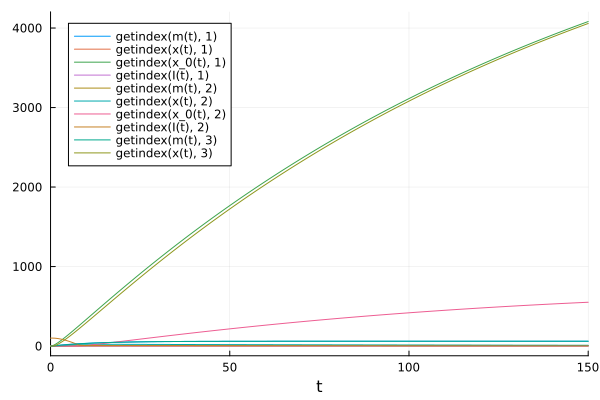

In [49]:
include("DSL_backend/ode_system.jl")

# Units = uM
tx1 = [100,5,95] # km = 1
tx2 = [17,2,100] # km = 1/6
tx3 = [100,5,95] # km = 1
tl1 = [7,1,104] # km = 1/15
tl2 = [7,1,104] # km = 1/15
tl3 = [7,1,104] # km = 1/15

act1 = [10,1] # k =  10 uM
act2 = [100,1] # k = 100 uM
# act3 = [10,1] # k = 10 uM

ind1 = [1,252] # k_hat = 1/252
ind2 = [1,1000] # k_hat = 1/1000

dg = 0.0833 # degradation rate δ


node_1 = createnode(:A, tx1, tl1, dg, 0.06) # Gene concentration = 0.06uM 
link_1 = tfactivation(:I1, node_1, ind1, 1.4, 1) # AHL conc. = 1uM

node_2 = createnode(:B, tx2, tl2, dg, 0.06)
link_2 = activate(node_1, node_2, act1, 1) # cooperativity = 1
link_3 = tfactivation(:I2, node_2, ind2, 4, 100) # SAL conc. = 100uM

node_3 = createnode(:C, tx3, tl3, dg, 0.06)
link_4 = activate(node_2, node_3, act2, 1)

compiled_links = compilelinks(link_1, link_2, link_3, link_4)
compiled_nodes = compilenodes(node_1, node_2, node_3)

node_sys = createnodesystem(compiled_nodes, compiled_links)

res = runsystem(node_sys, 1, 1, 0.0067, (0,150)) # ribosome = rnap concentration = 1, λ = 0.0067

plot(res)

In [55]:
include("DSL_backend/BurdenCalcV1.jl")
using BioSequences

# DNA sequences:
# NahR http://parts.igem.org/Part:BBa_K598026
NahR = LongDNA{2}("tcaatccgtaaacaggtcaaacatcagttgccgcaaccaaatattggctaggtccttgtggtacttcgcatgccagaacatgttgatggctatttcaggcaagacgactgggtgcggcaaggcgcttaggccgaagggctccacgcagcagtcggctaaacgtatcggcacagtggcgagcagatcggtgcgctggaggatgtggccaacggcggcgaagtgcggcacttccagacggatgtcgcgccggatgccgacccgtgtcatgtacgtgtccacctcgccgtggccggtgccagcggcgatgacacgcacgtggccgtaggaacagaagcgctccagagtcaggggttcgcgggtgactggatggtccttgcgacataggcacacgtagtgattctggagcagccggcgctgaaagaagccagtttgcagattgggaagcaggcccacggccaagtccacggttccgttctgcaaggcctgcatcaggctcatcgaactgtcgcgcaccgtactgatcacgcaattgggggcctggtgagccagcacatccatcagccgcggcatgaagtagatctcgccaatgtcggtcatggccagggtgaaggtacgctcgctggtcagcggatcgaagctttcatggtgctgtagggcgttgcgcagtgcgtgcatggccgaagtgacgggctcggccagatgcgcggcatagggtgtgggttccattccctgatgtgtgcgcacgaagagtgggtcctgtagcgaggtgcgcaggcgtttcagcgcattgctcacggcaggctgggtcaggcccaggttctccgcagtgatagagacgcgtctgtcgaccagcaactggttgaacaccaccagcaggtttaaatccaggtcacgcagttccat")

# LuxR http://parts.igem.org/Part:BBa_C0062 from J85001
LuxR = LongDNA{2}("atgaaaaacataaatgccgacgacacatacagaataattaataaaattaaagcttgtagaagcaataatgatattaatcaatgcttatctgatatgactaaaatggtacattgtgaatattatttactcgcgatcatttatcctcattctatggttaaatctgatatttcaatcctagataattaccctaaaaaatggaggcaatattatgatgacgctaatttaataaaatatgatcctatagtagattattctaactccaatcattcaccaattaattggaatatatttgaaaacaatgctgtaaataaaaaatctccaaatgtaattaaagaagcgaaaacatcaggtcttatcactgggtttagtttccctattcatacggctaacaatggcttcggaatgcttagttttgcacattcagaaaaagacaactatatagatagtttatttttacatgcgtgtatgaacataccattaattgttccttctctagttgataattatcgaaaaataaatatagcaaataataaatcaaacaacgatttaaccaaaagagaaaaagaatgtttagcgtgggcatgcgaaggaaaaagctcttgggatatttcaaaaatattaggttgcagtgagcgtactgtcactttccatttaaccaatgcgcaaatgaaactcaatacaacaaaccgctgccaaagtatttctaaagcaattttaacaggagcaattgattgcccatactttaaaaat")

# GFP http://parts.igem.org/Part:BBa_J85201
GFP = LongDNA{2}("atgcgtaaaggagaagaacttttcactggagttgtcccaattcttgttgaattagatggtgatgttaatgggcacaaattttctgtcagtggagagggtgaaggtgatgcaacatacggaaaacttacccttaaatttatttgcactactggaaaactacctgttccatggccaacacttgtcactactttcggttatggtgttcaatgctttgcgagatacccagatcatatgaaacagcatgactttttcaagagtgccatgcccgaaggttatgtacaggaaagaactatatttttcaaagatgacgggaactacaagacacgtgctgaagtcaagtttgaaggtgatacccttgttaatagaatcgagttaaaaggtattgattttaaagaagatggaaacattcttggacacaaattggaatacaactataactcacacaatgtatacatcatggcagacaaacaaaagaatggaatcaaagttaacttcaaaattagacacaacattgaagatggaagcgttcaactagcagaccattatcaacaaaatactccaattggcgatggccctgtccttttaccagacaaccattacctgtccacacaatctgccctttcgaaagatcccaacgaaaagagagaccacatggtccttcttgagtttgtaacagctgctgggattacacatggcatggatgaactatacaaataataa")

# Use Cost Calculation functions
m1_cost = txcost(NahR) # "ATP" cost of one transcript of NahR
x1_cost = tlcost(NahR) # "ATP" cost of synthesising NahR protein
m2_cost = txcost(LuxR) # "ATP" cost of one transcript of LuxR 
x2_cost = tlcost(LuxR) # "ATP" cost of synthesising LuxR protein
m3_cost = txcost(GFP) # "ATP" cost of one transcript of GFP 
x3_cost = tlcost(GFP) # "ATP" cost of synthesising GFP protein

# Use total cost from simulation

6747.600000000001